<a href="https://colab.research.google.com/github/jsluistavares-mtg/TesteTecnico/blob/main/TesteTecnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 💻 AUDITORIA DOS DADOS



Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [2]:
df = pd.read_csv("data/Car_Insurance_Claim.csv")
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


Informações dos Dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

Dados Faltantes

In [4]:
missing_data = df.isnull().sum()
missing_data[missing_data > 0]

CREDIT_SCORE      982
ANNUAL_MILEAGE    957
dtype: int64

Dados Duplicados

In [5]:
df.duplicated().sum()

np.int64(0)

Outliers

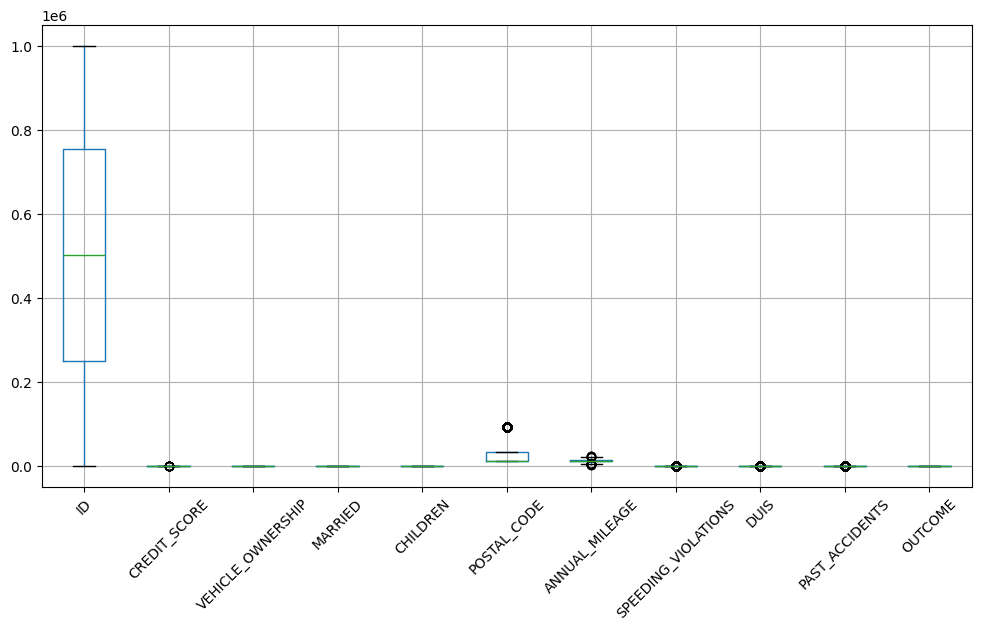

In [6]:
df.boxplot(figsize=(12,6), rot=45)
plt.show()

In [8]:
sns.boxplot(x=df['DUIS'])

<Axes: xlabel='DUIS'>

In [9]:
df['OUTCOME'].value_counts(normalize=True)

OUTCOME
0.0    0.6867
1.0    0.3133
Name: proportion, dtype: float64

# 📊 Relatório de Auditoria da Base de Dados
## 1. Integridade dos Dados

A base de dados pode ser considerada íntegra, pois não há erros de tipagem relevantes que possam gerar inconsistências ou falhas nas análises.

&emsp; 🔎 Observações:

Os campos MARRIED e CHILDREN retornam valores 0 ou 1, caracterizando variáveis binárias.

Recomenda-se a conversão desses campos para o tipo booleano, o que pode:

Melhorar a performance

Reduzir o uso de memória

Tornar o modelo de dados semanticamente mais claro

## 2. Duplicidade de Dados

Não foi identificada duplicação de registros, o que gera maior confiança na base de dados.

As chaves primárias aparentam estar corretamente ajustadas.

A integridade estrutural da base está preservada.

## 3. Análise de Outliers

Foram identificados alguns outliers que devem ser avaliados individualmente.

&emsp;  📌 CREDIT_SCORE

Apresenta quantidade considerável de valores abaixo do primeiro quartil.

Recomenda-se análise mais detalhada para verificar consistência dos dados.

&emsp;  📌 POSTAL_CODE

Caso a empresa atue em uma região onde todos os CEPs sejam iguais, o valor divergente pode indicar:

Erro de digitação

Registro inconsistente

&emsp; 📌 ANNUAL_MILEAGE

Alguns poucos valores acima do terceiro quartil.

Aparentemente dentro de um comportamento esperado.

&emsp;  📌 SPEEDING_VIOLATIONS, DUIS e PAST_ACCIDENTS

Devem ser monitorados com atenção.

Valores acima de 0 já indicam clientes com maior probabilidade de risco futuro.

Podem ser considerados indicadores relevantes para modelagem preditiva.

⚠️ Observação: Ignorar esta seção caso seja confirmado que algum dado está inconsistente ou foi digitado incorretamente.

## 4. Análise de Sinistros

31,33% dos clientes acionaram sinistro

68,67% não acionaram sinistro

&emsp; 📌 Conclusão: Aproximadamente 1 a cada 3 clientes acionou sinistro.

## 💻 TRATAMENTO DOS DADOS

In [10]:
df['MISSING_CREDIT_SCORE'] = df['CREDIT_SCORE'].isnull()
df['MISSING_ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].isnull()

df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].median(), inplace=True)
df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median(), inplace=True)

C:\Users\josel\AppData\Local\Temp\ipykernel_21448\2173319325.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].median(), inplace=True)
C:\Users\josel\AppData\Local\Temp\ipykernel_21448\2173319325.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10000 non-null  int64  
 1   AGE                     10000 non-null  object 
 2   GENDER                  10000 non-null  object 
 3   RACE                    10000 non-null  object 
 4   DRIVING_EXPERIENCE      10000 non-null  object 
 5   EDUCATION               10000 non-null  object 
 6   INCOME                  10000 non-null  object 
 7   CREDIT_SCORE            10000 non-null  float64
 8   VEHICLE_OWNERSHIP       10000 non-null  float64
 9   VEHICLE_YEAR            10000 non-null  object 
 10  MARRIED                 10000 non-null  float64
 11  CHILDREN                10000 non-null  float64
 12  POSTAL_CODE             10000 non-null  int64  
 13  ANNUAL_MILEAGE          10000 non-null  float64
 14  VEHICLE_TYPE            10000 non-null 

# 🧠 Estratégia Adotada para Tratamento de Dados

## 1. Tratamento de Valores Ausentes (Missing Values)

A remoção dos dados se torna inviável avaliando que era na faixa de 10% dos dados que não tinha CREDIT_SCORE ou ANNUAL_MILEAGE

## 2. Imputação de Variáveis Numéricas

Para as variáveis numéricas com valores ausentes, foi adotada a estratégia de imputação pela mediana.

# 💻 KPI'S

In [12]:
total_clientes = len(df)
total_sinistros = df['OUTCOME'].sum()
taxa_sinistro = total_sinistros / total_clientes

total_clientes, total_sinistros, round(taxa_sinistro,4)

(10000, np.float64(3133.0), np.float64(0.3133))

# Total de Clientes 🧑‍💼: 10000

# Total de Sinistros 💥: 3133

# Taxa de Sinistros 📈: 31,33%

# 💻 Segmentação

In [13]:
df.groupby('AGE')['OUTCOME'].mean().sort_values(ascending=False)

AGE
16-25    0.718254
26-39    0.336925
40-64    0.155919
65+      0.098492
Name: OUTCOME, dtype: float64

In [14]:
df.groupby('DRIVING_EXPERIENCE')['OUTCOME'].mean().sort_values(ascending=False)

DRIVING_EXPERIENCE
0-9y      0.628045
10-19y    0.238557
20-29y    0.051439
30y+      0.019011
Name: OUTCOME, dtype: float64

In [15]:
df.groupby('VEHICLE_TYPE')['OUTCOME'].mean().sort_values(ascending=False)

VEHICLE_TYPE
sports car    0.324948
sedan         0.312717
Name: OUTCOME, dtype: float64

In [16]:
df.groupby('VEHICLE_YEAR')['OUTCOME'].mean().sort_values(ascending=False)

VEHICLE_YEAR
before 2015    0.403330
after 2015     0.106495
Name: OUTCOME, dtype: float64

In [17]:
df.groupby('INCOME')['OUTCOME'].mean().sort_values(ascending=False)

INCOME
poverty          0.653804
working class    0.453271
middle class     0.276894
upper class      0.133533
Name: OUTCOME, dtype: float64

In [18]:
df['SCORE_BIN'] = pd.qcut(df['CREDIT_SCORE'], 4)
df.groupby('SCORE_BIN')['OUTCOME'].mean()

C:\Users\josel\AppData\Local\Temp\ipykernel_21448\1738602398.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('SCORE_BIN')['OUTCOME'].mean()


SCORE_BIN
(0.0524, 0.432]    0.534400
(0.432, 0.525]     0.327984
(0.525, 0.608]     0.216526
(0.608, 0.961]     0.152400
Name: OUTCOME, dtype: float64

In [19]:
df['MILEAGE_BIN'] = pd.qcut(df['ANNUAL_MILEAGE'], 4)
df.groupby('MILEAGE_BIN')['OUTCOME'].mean()

C:\Users\josel\AppData\Local\Temp\ipykernel_21448\2739324700.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('MILEAGE_BIN')['OUTCOME'].mean()


MILEAGE_BIN
(1999.999, 10000.0]    0.226667
(10000.0, 12000.0]     0.297258
(12000.0, 13000.0]     0.342128
(13000.0, 22000.0]     0.435593
Name: OUTCOME, dtype: float64

In [20]:
df.groupby('SPEEDING_VIOLATIONS')['OUTCOME'].mean().head()

SPEEDING_VIOLATIONS
0    0.491647
1    0.158031
2    0.170543
3    0.108434
4    0.109434
Name: OUTCOME, dtype: float64

In [21]:
df.groupby('DUIS')['OUTCOME'].mean().head()

DUIS
0    0.358955
1    0.127891
2    0.066465
3    0.088235
4    0.300000
Name: OUTCOME, dtype: float64

In [22]:
df.groupby('PAST_ACCIDENTS')['OUTCOME'].mean().head()

PAST_ACCIDENTS
0    0.469735
1    0.150308
2    0.129529
3    0.085139
4    0.073770
Name: OUTCOME, dtype: float64

# 📊 Análise de Segmentação e Padrões de Sinistro
## 1. Faixa Etária

Observa-se uma incidência significativamente maior de sinistros entre clientes mais jovens, especialmente na faixa de 16 a 25 anos, com redução moderada entre 26 e 39 anos.

Esse comportamento sugere que motoristas menos experientes tendem a acionar mais sinistros, possivelmente devido a menor tempo de habilitação e menor maturidade na condução.

## 2. Idade do Veículo

Veículos mais antigos apresentam taxa de sinistro consideravelmente maior quando comparados a veículos mais novos.

Isso pode estar relacionado a:

&emsp;Maior desgaste mecânico

&emsp;Menor presença de tecnologias de segurança

&emsp;Custos maiores de manutenção preventiva

## 3. Classe Socioeconômica

O acionamento de sinistros aumenta conforme o nível socioeconômico diminui, com maior incidência nas classes de menor renda, especialmente entre pobreza e classe trabalhadora.

Esse padrão pode estar associado a:

&emsp;Condições de uso mais intensivas do veículo

&emsp;Maior exposição a áreas de risco

&emsp;Ignorar manutenção preventiva por motivo de custo

## 5. Score de Crédito

Clientes com score muito baixo apresentam risco significativamente maior de acionamento de sinistro.

Há uma relação clara entre pior classificação de crédito e aumento da incidência de sinistros.

## 6. Quilometragem Anual

A incidência de sinistro cresce conforme a quilometragem anual aumenta.

Veículos com rodagem acima de 13.000 milhas/ano já demonstram probabilidade considerável de acionamento, indicando que maior exposição ao trânsito eleva o risco.

## 7. Infrações por Excesso de Velocidade

Observa-se que clientes que não possuem registros de excesso de velocidade acionam mais o seguro do que aqueles que possuem infrações.

Esse resultado é contraintuitivo e pode indicar:

&emsp;Sinistros de menor gravidade (ex: troca de pneus, pequenos danos)

&emsp;Possível subnotificação de infrações

&emsp;Perfil de condutor mais cauteloso, porém mais propenso a acionar coberturas menores

&emsp;Recomenda-se análise aprofundada para validação dessa hipótese. ⚠️

## 8. DUIs

Clientes que nunca foram registrados dirigindo sob efeito de substâncias apresentam quantidade de sinistros semelhante àqueles com quatro ou mais ocorrências.

Esse resultado exige investigação adicional, pois não segue o padrão esperado de maior risco associado a múltiplas infrações graves. ⚠️

## 9. Histórico de Acidentes

Clientes que nunca tiveram acidentes registrados são os que mais acionam sinistros.

Esse comportamento é fortemente contraintuitivo e pode indicar:

Problemas de qualidade de dados

&emsp;Diferença entre "acidente registrado" e "sinistro acionado"

&emsp;Uso do seguro para eventos não classificados formalmente como acidente

&emsp;Uma análise mais aprofundada é necessária para compreender essa relação. ⚠️

# 💡 Implicações de Negócio e Insights Estratégicos
## 🎯 1. Precificação Baseada em Risco

&emsp;Jovens entre 16–25 anos devem ter precificação diferenciada ou exigência de franquias mais altas.

&emsp;Veículos antigos podem demandar ajuste de prêmio.

&emsp;Alta quilometragem anual deve ser considerada como fator de aumento de risco.

&emsp;Score de crédito deve ter papel relevante no cálculo atuarial.

&emsp;Classe socioeconômica pode ser um forte indicador complementar de risco.

## 🔍 2. Necessidade de Auditoria e Validação de Dados

Os seguintes pontos exigem revisão técnica:

&emsp;Clientes sem histórico de acidente acionando mais sinistros.

&emsp;Relação inesperada entre ausência de infrações e maior acionamento.

&emsp;DUIs não impactando significativamente a taxa de sinistro.

Esses padrões podem indicar:

&emsp;Problemas de classificação ⚠️

&emsp;Inconsistência no registro histórico ⚠️

&emsp;Variáveis com definições diferentes entre bases ⚠️

## 🚀 3. Oportunidades Estratégicas

&emsp;Criar programas de educação e direção defensiva para jovens.

&emsp;Oferecer benefícios para clientes que mantém manutenção preventiva em veículos antigos.